# Predicting Chronic Kidney Disease based on health records
Given 24 health related attributes taken in 2-month period of 400 patients, using the information of the 158 patients with complete records to predict the outcome (i.e. whether one has chronic kidney disease) of the remaining 242 patients (with missing values in their records).



In [18]:
#Make necessary imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pycaret.datasets import get_data

dataset = pd.read_csv("Kidney_Disease_Pre-Processed.csv").drop("Unnamed: 0",axis=1)
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,69,33,1,1,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,53,33,0,0,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,67,33,0,1,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,59,18,1,0,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,65,26,0,0,0,0,0,0,0


In [19]:
#check the shape of data
dataset.shape

(400, 26)

In [20]:
# creating the training data
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
# creating the test data
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (380, 26)
Unseen Data For Predictions: (20, 26)


In [21]:
# Setting up Environment in PyCaret
from pycaret.classification import *

In [22]:
exp_clf101 = setup(data = data, target = 'classification', session_id=123) 

,Description,Value
0,session_id,123
1,Target,classification
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(380, 26)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [23]:
exp_clf102 = setup(data = data, target = 'classification',pca=True,pca_components=0.95, session_id=124) 

,Description,Value
0,session_id,124
1,Target,classification
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(380, 26)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
# Comparing Model

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3230
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0020
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0280
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0020
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0100
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0250
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1180
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3520
knn,K Neighbors Classifier,0.9963,0.9971,1.0000,0.9909,0.9952,0.9922,0.9925,0.2250
lightgbm,Light Gradient Boosting Machine,0.9963,1.0000,1.0000,0.9909,0.9952,0.9922,0.9925,0.0940


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=124, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# Create a Model

lda = create_model('lda') # from the table above, we can see that catboost works the

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9630,1.0000,1.0000,0.9091,0.9524,0.9222,0.9250
2,0.9259,1.0000,1.0000,0.8333,0.9091,0.8475,0.8575
3,0.9630,1.0000,1.0000,0.9091,0.9524,0.9222,0.9250
4,0.9259,1.0000,1.0000,0.8462,0.9167,0.8508,0.8605
5,0.9615,1.0000,1.0000,0.9091,0.9524,0.9202,0.9232
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9615,1.0000,1.0000,0.9091,0.9524,0.9202,0.9232
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [26]:
# Tune a Model

tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9630,1.0000,1.0000,0.9091,0.9524,0.9222,0.9250
2,0.9259,1.0000,1.0000,0.8333,0.9091,0.8475,0.8575
3,0.9630,1.0000,1.0000,0.9091,0.9524,0.9222,0.9250
4,0.9259,1.0000,1.0000,0.8462,0.9167,0.8508,0.8605
5,0.9615,1.0000,1.0000,0.9091,0.9524,0.9202,0.9232
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


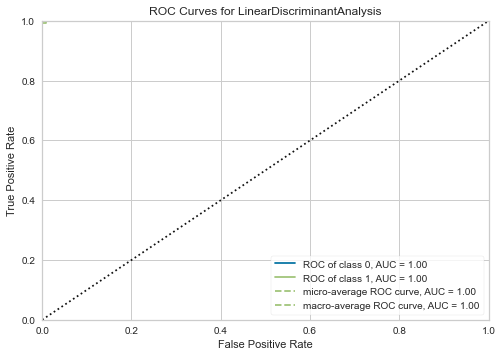

In [27]:
# Plotting Metrix
# ROC
plot_model(tuned_lda, plot = 'auc')

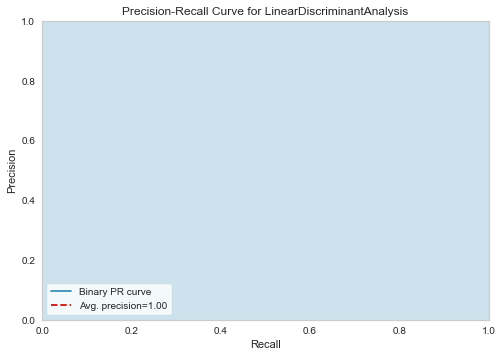

In [28]:
# Precision Recall curve
plot_model(tuned_lda, plot = 'pr')

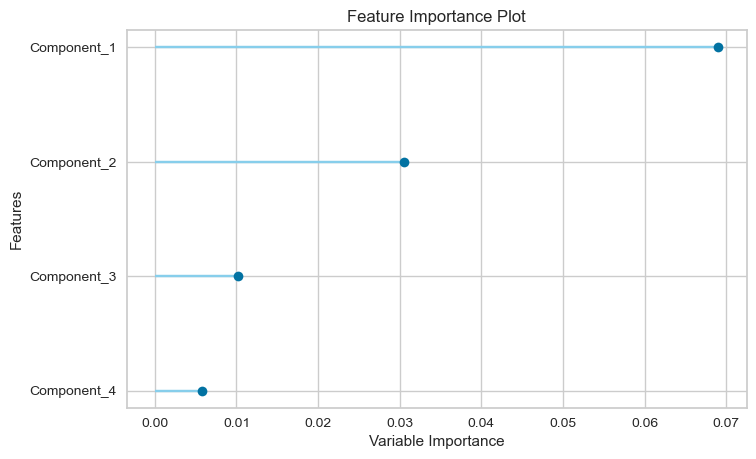

In [29]:
# Feature Importance Plot
plot_model(tuned_lda, plot='feature')

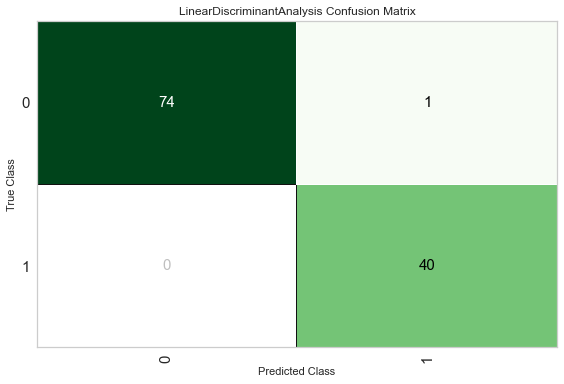

In [30]:
# Confusion Metrix

plot_model(tuned_lda, plot = 'confusion_matrix')

In [31]:
# Evaluate model

evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [32]:
predict_model(tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9913,1.0000,1.0000,0.9756,0.9877,0.9809,0.9811


,Component_1,Component_2,Component_3,Component_4,classification,Label,Score
0,30.891678,-58.399075,14.635016,-19.230885,0,0,0.9460
1,47.765221,30.092361,-22.515184,14.177892,0,0,0.9979
2,-106.927803,-20.705462,-15.612129,3.348938,1,1,0.9974
3,91.112335,46.022800,-62.489433,-20.323189,0,0,0.9999
4,-65.047668,-7.155440,-15.864466,-18.509264,1,1,0.9251
...,...,...,...,...,...,...,...
110,-127.128677,-13.462497,-12.244899,-11.067662,1,1,0.9991
111,77.382385,4.487614,32.376949,-38.482700,0,0,0.9997
112,2.382462,54.898369,1.040694,-13.748788,0,0,0.9850
113,170.933090,-37.283314,-2.246791,10.930974,0,0,1.0000


In [33]:
# Predict on test data

unseen_predictions = predict_model(tuned_lda, data=data_unseen)
unseen_predictions.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,rc,htn,dm,cad,appet,pe,ane,classification,Label,Score
0,380,51,1,3,0,0,1,1,0,0,...,29,0,0,0,0,0,0,1,1,1.0000
1,381,63,2,4,0,0,1,1,0,0,...,40,0,0,0,0,0,0,1,1,1.0000
2,382,40,3,4,0,0,1,1,0,0,...,46,0,0,0,0,0,0,1,1,1.0000
3,383,71,3,4,0,0,1,1,0,0,...,31,0,0,0,0,0,0,1,1,0.9999
4,384,49,1,3,0,0,1,1,0,0,...,25,0,0,0,0,0,0,1,1,1.0000


In [34]:
# Save model

save_model(tuned_lda,'tuned_lda_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='classification',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'),
                 ('pca',
                  Reduce_Dimensions_For_Supervised_Path(method='pca_liner',
           